# Momentum

2.4.3 shows the following "naive" momentum code

```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```

what is going on? looks like we're double counting `gradient` when updating `w` ...

I used [Jason Brownlee: Gradient Descent With Momentum from Scratch](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/) as a start point for this notebook

In [1]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [2]:
# objective function
def objective(x):
    return x**2.0
 
# derivative of objective function
def derivative(x):
    return x * 2.0 

Small change to the Jason Brownlee code; when we "take a step" &darr; we use an `optimizer` - so we can run exactly the same `gradient_descent` code with different momentum implementations

In [3]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, optimizer, solution):
    # track all solutions
    solutions, scores = list(), list()
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = optimizer.step(solution, gradient)
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

Note: with `seed(4)`, generating an initial point gives us `0.93405968`

In [4]:
def learn(optimizer, solution=0.93405968, bounds=asarray([[-1.0, 1.0]])):
    # define the total iterations
    n_iter = 30
    # perform the gradient descent search
    solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, optimizer, solution)
    # sample input range uniformly at 0.1 increments
    inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
    # compute targets
    results = objective(inputs)
    # create a line plot of input vs result
    pyplot.plot(inputs, results)
    # plot the solutions found
    pyplot.plot(solutions, scores, '.-', color='red')
    # show the plot
    pyplot.show()

# Optimizers

In [5]:
class Opimizer:
    "Gradient descent"
    def __init__(self, step_size=0.1):
        self.step_size = step_size
        
    def step(self, solution, gradient):
        return solution - self.step_size * gradient

In [6]:
class OptimizerWithBrowleeMomentum:
    "Gradient descent with momentum as Jason Brownlee did it"
    def __init__(self, step_size=0.1, momentum=0.3):
        self.step_size = step_size
        self.momentum = momentum
        self.change = 0.0
        
    def step(self, solution, gradient):
        new_change = self.step_size * gradient + self.momentum * self.change
        solution = solution - new_change
        self.change = new_change
        return solution

In [7]:
class OptimizerWithFastaiMomentum:
    "Gradient descent with momentum as Fastai do it"
    # https://docs.fast.ai/optimizer.html
    def __init__(self, step_size=0.1, momentum=0.3, dampening=False):
        self.step_size = step_size
        self.momentum = momentum                     # fastai call this mom
        self.damp = 1 - momentum if dampening else 1
        self.change = 0.0                            # fastai call this grad_avg
        
    def step(self, solution, gradient):
        # https://github.com/fastai/fastai/blob/master/fastai/optimizer.py#L118
        # grad_avg.mul_(mom).add_(p.grad.data, alpha=damp)
        self.change = (self.change * self.momentum) + (gradient * self.damp)
        # https://github.com/fastai/fastai/blob/master/fastai/optimizer.py#L137
        # p.data.add_(grad_avg, alpha=-lr)
        solution = solution + (self.change * -self.step_size)
        return solution

In [8]:
class OptimizerWithNaiveMomentum:
    "Gradient descent with momentum as shown on 2.4.3 p55"
    def __init__(self, step_size=0.1, momentum=0.3):
        self.step_size = step_size # learning_rate
        self.momentum = momentum
        self.change = 0.0          # past_velocity
        
    def step(self, solution, gradient):
        new_change = self.change * self.momentum - self.step_size * gradient
        solution = solution + self.momentum * new_change - self.step_size * gradient
        self.change = new_change
        return solution

# Gradient descent without momentum

Note: we can "find" the solution in one step if we use a step size (learning rate) of .5 ... but that's not the point of this noteboook (o:

>0 f(0.7472477439999999) = 0.55838
>1 f(0.5977981952) = 0.35736
>2 f(0.47823855616) = 0.22871
>3 f(0.382590844928) = 0.14638
>4 f(0.3060726759424) = 0.09368
>5 f(0.24485814075392) = 0.05996
>6 f(0.195886512603136) = 0.03837
>7 f(0.1567092100825088) = 0.02456
>8 f(0.12536736806600704) = 0.01572
>9 f(0.10029389445280563) = 0.01006
>10 f(0.08023511556224451) = 0.00644
>11 f(0.0641880924497956) = 0.00412
>12 f(0.05135047395983648) = 0.00264
>13 f(0.041080379167869184) = 0.00169
>14 f(0.032864303334295346) = 0.00108
>15 f(0.026291442667436278) = 0.00069
>16 f(0.021033154133949024) = 0.00044
>17 f(0.016826523307159218) = 0.00028
>18 f(0.013461218645727375) = 0.00018
>19 f(0.0107689749165819) = 0.00012
>20 f(0.00861517993326552) = 0.00007
>21 f(0.006892143946612415) = 0.00005
>22 f(0.005513715157289932) = 0.00003
>23 f(0.0044109721258319455) = 0.00002
>24 f(0.0035287777006655563) = 0.00001
>25 f(0.002823022160532445) = 0.00001
>26 f(0.0022584177284259562) = 0.00001
>27 f(0.001806734182740765)

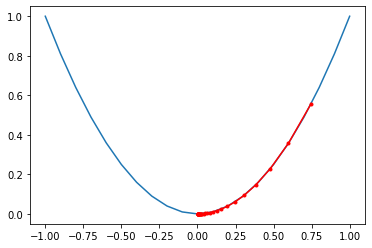

In [9]:
learn(Opimizer())

# With "Brownlee" momentum &darr;

>0 f(0.7472477439999999) = 0.55838
>1 f(0.5417546144) = 0.29350
>2 f(0.37175575263999994) = 0.13820
>3 f(0.24640494358399995) = 0.06072
>4 f(0.15951871215039995) = 0.02545
>5 f(0.10154910029023996) = 0.01031
>6 f(0.06384839667414396) = 0.00408
>7 f(0.03976850625448637) = 0.00158
>8 f(0.02459083787769182) = 0.00060
>9 f(0.01511936978911509) = 0.00023
>10 f(0.009254055404719052) = 0.00009
>11 f(0.00564365000845643) = 0.00003
>12 f(0.0034317983878863574) = 0.00001
>13 f(0.002081883224138064) = 0.00000
>14 f(0.0012605320301859633) = 0.00000
>15 f(0.0007620202659631404) = 0.00000
>16 f(0.0004600626835036654) = 0.00000
>17 f(0.00027746287206508987) = 0.00000
>18 f(0.00016719035422049924) = 0.00000
>19 f(0.0001006705280230222) = 0.00000
>20 f(6.058047455917464e-05) = 0.00000
>21 f(3.643736360818544e-05) = 0.00000
>22 f(2.1906957601251594e-05) = 0.00000
>23 f(1.316644427892112e-05) = 0.00000
>24 f(7.911001426437753e-06) = 0.00000
>25 f(4.752168285405193e-06) = 0.00000
>26 f(2.854084686014386e-

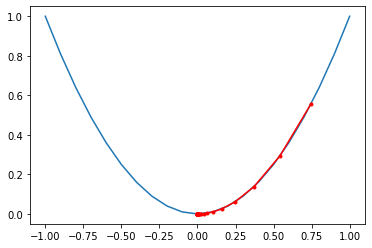

In [10]:
learn(OptimizerWithBrowleeMomentum())

# With "Fastai" momentum &darr;

`OptimizerWithFastaiMomentum(dampening=False)` does the same as `OptimizerWithBrowleeMomentum()`

>0 f(0.8032913248) = 0.64528
>1 f(0.651600032768) = 0.42458
>2 f(0.51486864057088) = 0.26509
>3 f(0.4017676132318208) = 0.16142
>4 f(0.31158983917764815) = 0.09709
>5 f(0.24091392947652562) = 0.05804
>6 f(0.18598320643947527) = 0.03459
>7 f(0.14346634062683364) = 0.02058
>8 f(0.11062599319528443) = 0.01224
>9 f(0.08528624991847986) = 0.00727
>10 f(0.0657442519468513) = 0.00432
>11 f(0.050677457282803554) = 0.00257
>12 f(0.03906257486399673) = 0.00153
>13 f(0.030109349657395142) = 0.00091
>14 f(0.023208073143379346) = 0.00054
>15 f(0.017888559949101497) = 0.00032
>16 f(0.013788307597943934) = 0.00019
>17 f(0.010627868828884513) = 0.00011
>18 f(0.008191835562122855) = 0.00007
>19 f(0.006314168603397158) = 0.00004
>20 f(0.004866884911303847) = 0.00002
>21 f(0.0037513359160933147) = 0.00001
>22 f(0.002891484189277091) = 0.00001
>23 f(0.0022287208847334315) = 0.00000
>24 f(0.0017178709695076532) = 0.00000
>25 f(0.0013241140592088483) = 0.00000
>26 f(0.001020611017829968) = 0.00000
>27 f(0.0

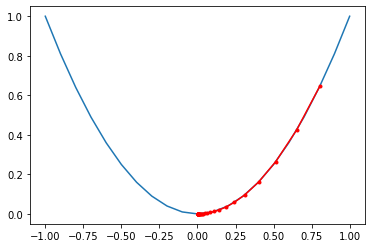

In [11]:
learn(OptimizerWithFastaiMomentum(dampening=True))

# With "naive" momentum &darr;

>0 f(0.6912041631999999) = 0.47776
>1 f(0.49467800652799987) = 0.24471
>2 f(0.3485761276211199) = 0.12151
>3 f(0.2437964511592447) = 0.05944
>4 f(0.16989003857654572) = 0.02886
>5 f(0.11817449184138881) = 0.01397
>6 f(0.0821278622566734) = 0.00674
>7 f(0.05705109870500702) = 0.00325
>8 f(0.039622455711605685) = 0.00157
>9 f(0.027515090250868228) = 0.00076
>10 f(0.019106304490117593) = 0.00037
>11 f(0.013266935009513923) = 0.00018
>12 f(0.009212099332266256) = 0.00008
>13 f(0.006396518903273566) = 0.00004
>14 f(0.004441475819660606) = 0.00002
>15 f(0.0030839703156613748) = 0.00001
>16 f(0.002141374931569284) = 0.00000
>17 f(0.0014868770530733254) = 0.00000
>18 f(0.0010324221516196303) = 0.00000
>19 f(0.0007168685449468174) = 0.00000
>20 f(0.0004977619703559789) = 0.00000
>21 f(0.00034562399838298185) = 0.00000
>22 f(0.00023998608543286616) = 0.00000
>23 f(0.00016663576923826517) = 0.00000
>24 f(0.00011570453950390791) = 0.00000
>25 f(8.034013646688058e-05) = 0.00000
>26 f(5.578465244461

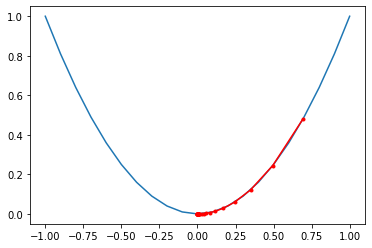

In [12]:
learn(OptimizerWithNaiveMomentum())

# What have we learned so far?

It don't think it makes sense to read too much into the different momentum implementations using this problem - because our objective function is smooth. 

Having said that ... we can see that
- "Brownlee" momentum converges fastest
- momentum with dampening takes the longest to converge - but is still faster than no momentum
- "Naive" momentum takes just a little longer than "Brownlee"
    - even though it takes the biggest steps for the first few steps

# Can we use momentum to get over a local minimum?

I borrowed the polynomial from https://mathonweb.com/help_ebook/html/functions_4.htm and calculated it's derivitive with https://www.derivative-calculator.net/

In [13]:
# objective function
def objective(x):
    return x**5 - 8*x**3 + 10*x + 6
 
# derivative of objective function
def derivative(x):
    return 5*x**4 - 24*x**2 + 10

here's the new objective function &darr;

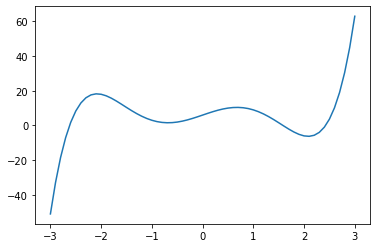

In [14]:
inputs = arange(-3, 3.1, 0.1)
results = objective(inputs)
pyplot.plot(inputs, results)
pyplot.show()

We'll ignore the extremes at -3 and 3 and pretend we just have
- a local minimum near -1 and
- a global minimum near 2 

so ... we want to start at -2, skip over the dip near -1 and end up in the dip near 2

>0 f(-1.82) = 16.05952
>1 f(-1.3808710640000004) = 8.23499
>2 f(-0.8533572756813219) = 1.98534
>3 f(-0.7085852130487796) = 1.58172
>4 f(-0.6848928577824471) = 1.57052
>5 f(-0.680161692006991) = 1.57007
>6 f(-0.6791779239364699) = 1.57005
>7 f(-0.6789716670409682) = 1.57005
>8 f(-0.6789283484562818) = 1.57005
>9 f(-0.6789192472819288) = 1.57005
>10 f(-0.6789173349922889) = 1.57005
>11 f(-0.6789169331858828) = 1.57005
>12 f(-0.6789168487588548) = 1.57005
>13 f(-0.6789168310191475) = 1.57005
>14 f(-0.6789168272917006) = 1.57005
>15 f(-0.6789168265084937) = 1.57005
>16 f(-0.6789168263439271) = 1.57005
>17 f(-0.6789168263093486) = 1.57005
>18 f(-0.6789168263020829) = 1.57005
>19 f(-0.6789168263005563) = 1.57005
>20 f(-0.6789168263002355) = 1.57005
>21 f(-0.6789168263001681) = 1.57005
>22 f(-0.678916826300154) = 1.57005
>23 f(-0.678916826300151) = 1.57005
>24 f(-0.6789168263001505) = 1.57005
>25 f(-0.6789168263001503) = 1.57005
>26 f(-0.6789168263001503) = 1.57005
>27 f(-0.6789168263001503) 

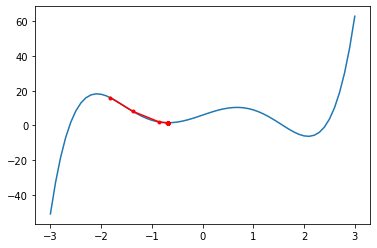

In [15]:
learn(Opimizer(0.03), solution=-2, bounds=asarray([[-3.0, 3.0]]))

&uarr; no surprise (o: but if we don't use momentum, we stop in the local miminum

&darr; `1.13` is the largest momentum we can use without causing overflow errors (and we are still stuck in the local minimum)

>0 f(-1.6166) = 12.59141
>1 f(-0.1999872839763548) = 4.06380
>2 f(0.19300884907922328) = 7.87284
>3 f(0.36151266982020563) = 9.24333
>4 f(0.41681985294500545) = 9.60144
>5 f(0.33268318699671545) = 9.03634
>6 f(-0.03280656123670658) = 5.67222
>7 f(-0.8321311685883543) = 1.88932
>8 f(-1.1275066311045232) = 4.36967
>9 f(-0.8101128776388975) = 1.80326
>10 f(-0.6429656098005975) = 1.58690
>11 f(-0.6356421788937177) = 1.59441
>12 f(-0.6672655279302364) = 1.57183
>13 f(-0.6845700127850829) = 1.57047
>14 f(-0.6842402672264484) = 1.57042
>15 f(-0.6799497365989972) = 1.57006
>16 f(-0.6781241512642564) = 1.57006
>17 f(-0.6783167722825119) = 1.57005
>18 f(-0.678836461145076) = 1.57005
>19 f(-0.6790234520962432) = 1.57005
>20 f(-0.6789836232966727) = 1.57005
>21 f(-0.6789214059052227) = 1.57005
>22 f(-0.6789030175429717) = 1.57005
>23 f(-0.6789095586750425) = 1.57005
>24 f(-0.6789168523556621) = 1.57005
>25 f(-0.6789185635631425) = 1.57005
>26 f(-0.6789175976292724) = 1.57005
>27 f(-0.6789167590257

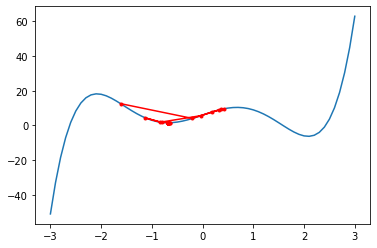

In [16]:
learn(OptimizerWithNaiveMomentum(.03, 1.13), solution=-2, bounds=asarray([[-3.0, 3.0]]))

The steep slope near 3 is the "cause" of the overflow errors ... i.e. gradients end up really big

Can we avoid overflow errors if we limit the magnitude of the gradients?

In [17]:
class OptimizerWithNaiveMomentumAndGradientClipping:
    "Gradient descent with momentum as shown on 2.4.3 p55 and gradient clipping"
    def __init__(self, step_size=0.1, momentum=0.3, max_gradient=1000):
        self.step_size = step_size # learning_rate
        self.momentum = momentum
        self.change = 0.0          # past_velocity
        self.max_gradient = max_gradient
        
    def step(self, solution, gradient):
        if gradient > self.max_gradient:
            gradient = self.max_gradient
        elif gradient < -self.max_gradient:
            gradient = -self.max_gradient
        new_change = self.change * self.momentum - self.step_size * gradient
        solution = solution + self.momentum * new_change - self.step_size * gradient
        self.change = new_change
        return solution

Increasing `step_size` or `momentum` by just `0.01` sends the solution way off (i.e. we diverge from the correct answer)

>0 f(-1.6148) = 12.55797
>1 f(-0.18774358756899046) = 4.17527
>2 f(0.21541972832648554) = 8.07469
>3 f(0.4171176545802218) = 9.60322
>4 f(0.5676939939119435) = 10.27227
>5 f(0.7649426531181098) = 10.33056
>6 f(1.2347157319797677) = 6.15803
>7 f(2.651450629929802) = 14.43706
>8 f(-1.9202179076337584) = 17.33347
>9 f(-3.433798709975402) = -181.82628
>10 f(-32.62105100020859) = -36662007.39759
>11 f(-115.65692281163098) = -20682278275.06390
>12 f(-240.3178166766525) = -801437549522.40894
>13 f(-412.431235682777) = -11932661503186.05078
>14 f(-638.6405333497589) = -106236529841271.14062
>15 f(-926.5191326901183) = -682759752814538.12500
>16 f(-1284.700735938128) = -3499514194758871.00000
>17 f(-1723.0277636408591) = -15186587851573518.00000
>18 f(-2252.7205752219725) = -58014418543619400.00000
>19 f(-2886.5703804244417) = -200405823681045664.00000
>20 f(-3639.1591583552563) = -638270815183183872.00000
>21 f(-4527.110365196385) = -1901539018584943616.00000
>22 f(-5569.374740995272) = -53583

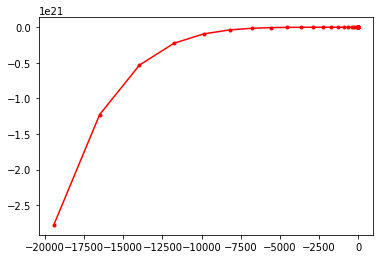

In [18]:
learn(OptimizerWithNaiveMomentumAndGradientClipping(.03, 1.14), solution=-2, bounds=asarray([[-3.0, 3.0]]))

but with gradient clipping we can just about keep the solution in the dip of the global min ...

>0 f(-1.6148) = 12.55797
>1 f(-0.18774358756899046) = 4.17527
>2 f(0.21541972832648554) = 8.07469
>3 f(0.4171176545802218) = 9.60322
>4 f(0.5676939939119435) = 10.27227
>5 f(0.7649426531181098) = 10.33056
>6 f(1.2347157319797677) = 6.15803
>7 f(2.651450629929802) = 14.43706
>8 f(2.470633088074884) = 2.11353
>9 f(1.6645010903602775) = -1.47109
>10 f(2.592391666890126) = 9.63218
>11 f(1.7467082318566156) = -2.90713
>12 f(2.5375533217390416) = 5.87207
>13 f(1.5846243902631776) = 0.00540
>14 f(2.3852879114380916) = -1.50234
>15 f(1.3731925248833652) = 3.89962
>16 f(2.0254438791399267) = -6.13142
>17 f(2.44791188371269) = 1.02866
>18 f(1.4981650912247786) = 1.62803
>19 f(2.298651751824166) = -4.00341
>20 f(1.2883814399539202) = 5.32481
>21 f(1.8518188758759908) = -4.50764
>22 f(2.811753694788777) = 32.02704
>23 f(2.160263257992249) = -6.00126
>24 f(1.6591946423641064) = -1.37480
>25 f(2.490608294765522) = 3.14522
>26 f(1.5327591686691004) = 0.97967
>27 f(2.3309476860551355) = -3.19699
>28 f

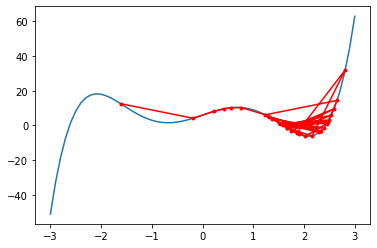

In [19]:
learn(OptimizerWithNaiveMomentumAndGradientClipping(.03, 1.14, 20), solution=-2, bounds=asarray([[-3.0, 3.0]]))

... but we're still bouncing around a lot.

Thought it might be fun to write a function that will take an `objective` and create the corresponding `derivative`

In [20]:
import inspect

def create_derivative_fn(objective_fn, derivative_fn_name='derivative'):
    source = inspect.getsource(objective_fn)
    source = source[source.index('return')+6:].strip()
    def split_pair(s, sep, dflt):
        return s.split(sep) if sep in s else dflt
    derivative_bits = []
    for source_bit in source.split(' '):
        if source_bit in ('-', '+'):
            derivative_bits.append(source_bit)
        else:
            multiply, exponent = split_pair(source_bit, '**', [source_bit, 1])
            if 'x' not in multiply:
                factor = 0
            else:
                factor, _ = split_pair(multiply, '*', [1, 1])
            factor, exponent = [int(s) for s in [factor, exponent]]
            derivative_bits.append(f'{factor*exponent}*x**{exponent-1}')
    derivative = ' '.join(derivative_bits)
    fn_string = f'def {derivative_fn_name}(x):\n    return {derivative}'
    print(fn_string)
    exec(fn_string, globals())

now we can quickly play around with different objective functions (as long as we stick to the simple syntax)

In [21]:
def objective(x):
    return x**4 - 8*x**2 + 10*x + 6
 
create_derivative_fn(objective)

def derivative(x):
    return 4*x**3 - 16*x**1 + 10*x**0 + 0*x**0


>0 f(-0.13) = 4.56509
>1 f(-0.295925756) = 2.34783
>2 f(-0.4996948330956107) = -0.93216
>3 f(-0.7443805173791262) = -5.56959
>4 f(-1.0252981258493943) = -11.55777
>5 f(-1.3095734083904746) = -17.87443
>6 f(-1.5948559931527988) = -23.82736
>7 f(-1.8712265281924456) = -28.46375
>8 f(-2.074771083539856) = -30.65488
>9 f(-2.1917697087087724) = -31.27152
>10 f(-2.2428379480014304) = -31.36682
>11 f(-2.259136824264747) = -31.37322
>12 f(-2.2620994429424224) = -31.37310
>13 f(-2.261506290143958) = -31.37315
>14 f(-2.2605992398425054) = -31.37321
>15 f(-2.2600519840544977) = -31.37322
>16 f(-2.2598116089953106) = -31.37322
>17 f(-2.259730429356357) = -31.37322
>18 f(-2.2597121346823688) = -31.37322
>19 f(-2.259712446398035) = -31.37322
>20 f(-2.259715671626587) = -31.37322
>21 f(-2.2597179149304525) = -31.37322
>22 f(-2.2597189813532066) = -31.37322
>23 f(-2.259719371731367) = -31.37322
>24 f(-2.2597194743742506) = -31.37322
>25 f(-2.259719483306453) = -31.37322
>26 f(-2.259719472809838) = -31

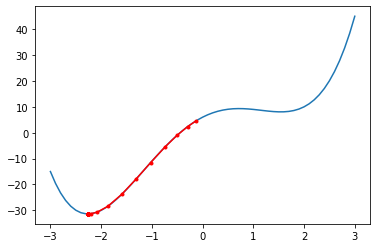

In [22]:
learn(OptimizerWithNaiveMomentumAndGradientClipping(.01, 0.3, 20), solution=0, bounds=asarray([[-3.0, 3.0]]))